In [1]:
#Raw file check - OrgEx
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#df = pd.read_csv('JanJournal_OE.tsv', sep='\t')
#df = pd.read_csv('FebJournal_OE.tsv', sep='\t')
df = pd.read_csv('MarJournal_OE.tsv', sep='\t')

In [22]:
def epoch_to_datetime(epoch_time):
    import datetime
    return datetime.datetime.fromtimestamp(epoch_time)

In [23]:
df['realtime'] = df['DATETIME'].apply(epoch_to_datetime)

In [24]:
df["month"] = df["realtime"].dt.month

In [25]:
df.month.value_counts()

3    4808623
4       3124
Name: month, dtype: int64

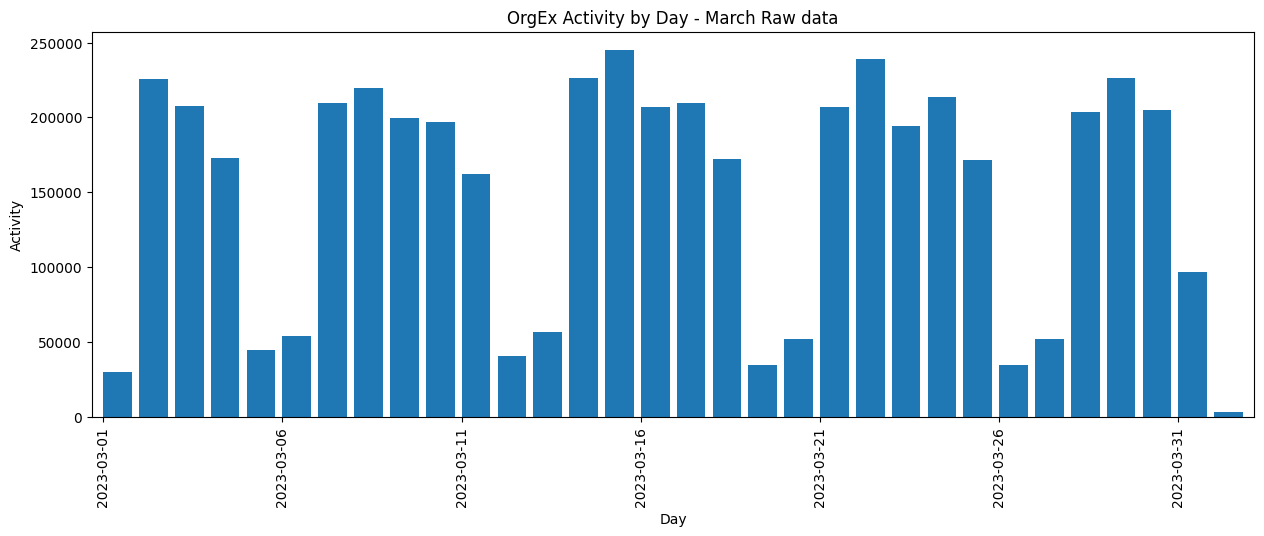

In [26]:
# Convert datetime strings to pandas datetimes
df['realtime'] = pd.to_datetime(df['realtime'])

# Group by day and count occurrences
day_counts = df.groupby(df['realtime'].dt.date)['realtime'].count()

# Set figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Plot bar chart with x-axis showing days
bar_width = 0.8
plt.bar(day_counts.index, day_counts.values, 
        width=bar_width, align='edge')
plt.title('OrgEx Activity by Day - March Raw data')
plt.xlabel('Day')
plt.ylabel('Activity')

# Set x-axis ticks for every day
ticks = pd.date_range(start=day_counts.index.min(), 
                      end=day_counts.index.max(), freq='5D')
plt.xticks(ticks=ticks, rotation=90)

# Add padding between bars
plt.margins(x=0.01)

plt.show()

In [27]:
len(df)

4811747